In [26]:
import keras.datasets.mnist as mnist
import matplotlib.pyplot as plt

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(path='mnist')

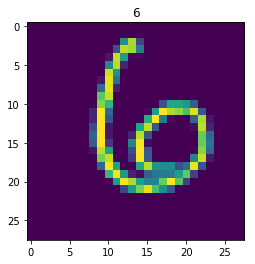

In [34]:
i = 100
plt.title(str(y_test[i]))
plt.imshow(x_test[i])
plt.show()

In [5]:
a = 5
b = 2
print("a + b = ", int(a)+int(b))
print("a - b = ", int(a)-int(b))

a + b =  7
a - b =  3


In [9]:
def __my_add__(self, other):
    return self - other

In [10]:
int.__add__ = __my_add__

TypeError: can't set attributes of built-in/extension type 'int'